In [3]:
import xarray as xr

# Sector means

In [4]:
datadir = '../../../data/'
filename = 'esm2m-control.monthly.wmean-latlon.JANtoDEC.0001-0300.ForBuchovecky.nc'
ds = xr.open_dataset(datadir+filename)

In [5]:
ds

<xarray.Dataset>
Dimensions:       (time: 3600, st_ocean: 50)
Coordinates:
  * time          (time) object 0001-01-16 12:00:00 ... 0300-12-16 12:00:00
  * st_ocean      (st_ocean) float64 5.0 15.0 25.0 ... 4.95e+03 5.316e+03
Data variables:
    PanAntarctic  (time, st_ocean) float64 ...
    Weddell       (time, st_ocean) float64 ...
    Indian        (time, st_ocean) float64 ...
    WestPacific   (time, st_ocean) float64 ...
    Ross          (time, st_ocean) float64 ...
    AB            (time, st_ocean) float64 ...

In [32]:
# Group by month and compute variance
dsvar = ds.groupby('time.month').var()
# and climatological mean
dsclim = ds.groupby('time.month').mean()
# and anomaly
dsanom = ds.groupby('time.month')-dsclim
# and variance of deasonalized months
dsvaralt = dsanom.groupby('time.month').var()
# and percent variance
dsperc = (dsvar/dsclim)*100

In [34]:
dsanom['PanAntarctic'].isel(st_ocean=0).var('time')

<xarray.DataArray 'PanAntarctic' ()>
array(6.71005748e-05)
Coordinates:
    st_ocean  float64 5.0

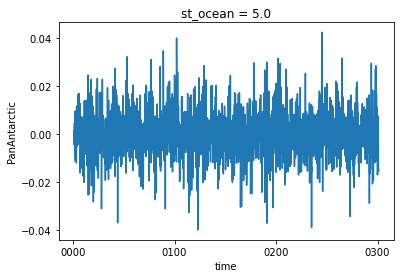

In [36]:
dsanom['PanAntarctic'].isel(st_ocean=0).plot()

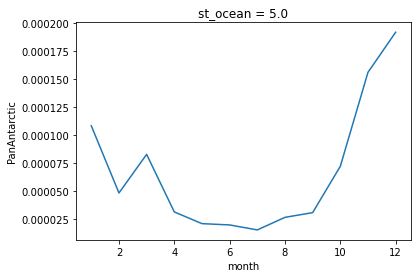

In [37]:
dsvaralt['PanAntarctic'].isel(st_ocean=0).plot()

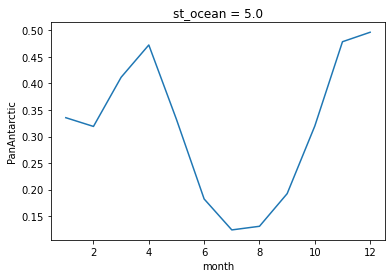

In [38]:
dsclim['PanAntarctic'].isel(st_ocean=0).plot()

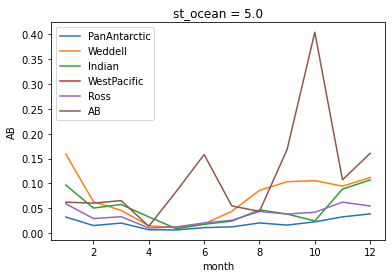

In [46]:
import matplotlib.pyplot as plt

for sector in ds.data_vars:
    dsperc[sector].isel(st_ocean=0).plot(label=sector)
plt.gca().legend()

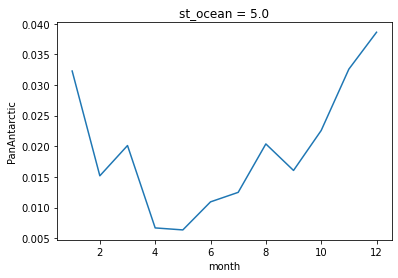

In [47]:
dsperc['PanAntarctic'].isel(st_ocean=0).plot()

### Maps

In [48]:
datadir = '../../../data/'
filename = 'esm2m-control.monthly.percentagevariance.JANtoDEC.0001-0300.ForBuchovecky.nc'
ds = xr.open_dataset(datadir+filename)

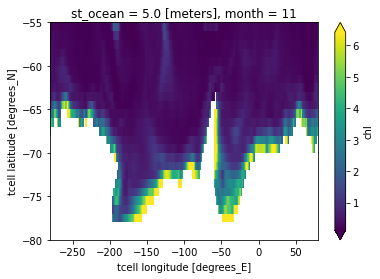

In [66]:
ds['chl'].sel(month=11).plot(robust=True)